## **Instrucciones**
* Antes de iniciar debe hacer una copia del notebook (Archivo > Guardar una copia en Drive)
* Debe completar el codigo faltante donde se marca "# TU CODIGO AQUI". Al agregar el código borra "# TU CODIGO AQUI".
* Una vez finalizada la tarea debe descargar el notebook (Archivo > Descargar > Descargar .ipynb) y enviar el archivo con los nombres de los integrantes del equipo a fernandosilva.clases@gmail.com hasta máximo el lunes 29 de Abril a horas 23:59 hora Bolivia.
* El trabajo final puede ser realizado de manera individual o grupal (máximo 4 alummnos por grupo)
* En caso de realizar el trabajo de manera grupal, solo debe enviar la tarea un integrante del grupo.
* En caso de realizar el trabajo de manera grupal, no se considerará si hay mas de 3 alumnos en el grupo.
* El nombre del archivo final debe ser en el siguiente formato: "tf_perez_juan.ipynb" donde el nombre es Juan Perez.

### Nombres integrantes:
* Arrazola Juan Pablo
* Brito Paolo
* Gutierrez José
* Molina Horacio



---



# Trabajo Final

### Descripción del trabajo final

Este trabajo consiste en aplicar Redes Neuronales y modelos de Machine Learning supervisado para analizar y predecir el puntaje crediticio (credit score) de clientes utilizando un conjunto de datos realista. Se emplearán técnicas de preprocesamiento de datos, como la normalización y codificación de variables, y se evaluarán múltiples modelos vistos en clase, y Redes Neuronales, para identificar el modelo más adecuado para esta tarea. También se realizarán métricas de desempeño para comprender mejor el comportamiento de cada modelo.

### Objetivo

El objetivo es desarrollar, implementar y comparar modelos de Machine Learning Supervisado, así como Redes Neuronales, para predecir con precisión el puntaje crediticio de clientes. Además, se busca identificar los factores más relevantes en la predicción y proporcionar una base sólida para la toma de decisiones en el ámbito financiero.



---



## Parte A: Pre-procesamiento (10 puntos)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

### Cargamos el dataset

Estás trabajando en una empresa financiera global. A lo largo de los años, la empresa ha recopilado detalles básicos de cuentas bancarias y ha reunido mucha información relacionada con el crédito. La dirección quiere desarrollar un sistema inteligente para clasificar a las personas en rangos de puntuación crediticia, con el objetivo de reducir los esfuerzos manuales. El dataset que usarás es sobre clasificación de puntuación crediticia.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/delveeducation/datasets/refs/heads/main/credit_score.csv')

### Seleccionamos características relevantes y el target

In [3]:
relevant_features = ['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
                     'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
                     'num_of_delayed_payment', 'outstanding_debt', 'credit_utilization_ratio',
                     'amount_invested_monthly', 'monthly_balance']

target = 'credit_score'

### Filtramos columnas

In [4]:
data = data[relevant_features + [target]]

### Transformamos el target a valores numéricos

In [5]:
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

### Lidiamos con valores faltantes

Utliza la media para rellenar los datos faltantes:




In [6]:
data = data.fillna(data.mean())

### Separamos características y target

In [7]:
X = data[relevant_features]
y = data[target]

### Normalizamos las características

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Dividimos en conjuntos de entrenamiento y prueba

[texto del enlace](https://)Utiliza el 20% para el test size y un random state de 42

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

[texto del enlace](https://)## Parte B: Aplica Redes Neuronales (45 puntos)

### Importamos lo necesario

In [11]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

### Creamos el modelo

En el siguiente codigo se proponen 4 capas (contando la de salida) puedes utilizar mas si consideras necesario.

* Pista 1: Tal como lo mencionamos en clase, utiliza el numero de nodos en base a potencias de 2, es decir 8, 16, 32,...
* Pista 2: Más capas no significa necesarimante mejor rendimiento.
* Pista 3: Si tienes overfitting, recuerda que puedes utilizar dropout-
* Pista 4: Revisa cuantas clases tienes en el target para definir el numero de nodos en la clase de salida, y en base a esto el tipo de función de activación que usarás.


In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilamos el modelo

Recuerda que el loss function depende del tipo de función de activación que utilizarás en tu capa de salida de tu red neuronal.

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Entrenamos el modelo y guardamos el historial

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6238 - loss: 0.8054 - val_accuracy: 0.6629 - val_loss: 0.7368
Epoch 2/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6602 - loss: 0.7368 - val_accuracy: 0.6617 - val_loss: 0.7445
Epoch 3/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6617 - loss: 0.7324 - val_accuracy: 0.6600 - val_loss: 0.7318
Epoch 4/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6711 - loss: 0.7197 - val_accuracy: 0.6693 - val_loss: 0.7260
Epoch 5/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6703 - loss: 0.7222 - val_accuracy: 0.6678 - val_loss: 0.7267
Epoch 6/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6668 - loss: 0.7231 - val_accuracy: 0.6717 - val_loss: 0.7222
Epoch 7/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6698 - loss: 0.7172 - val_accuracy: 0.6736 - val_loss: 0.7189
Epoch 8/100
2418/2418 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6739 - l

### Graficamos las pérdidas de entrenamiento y validación

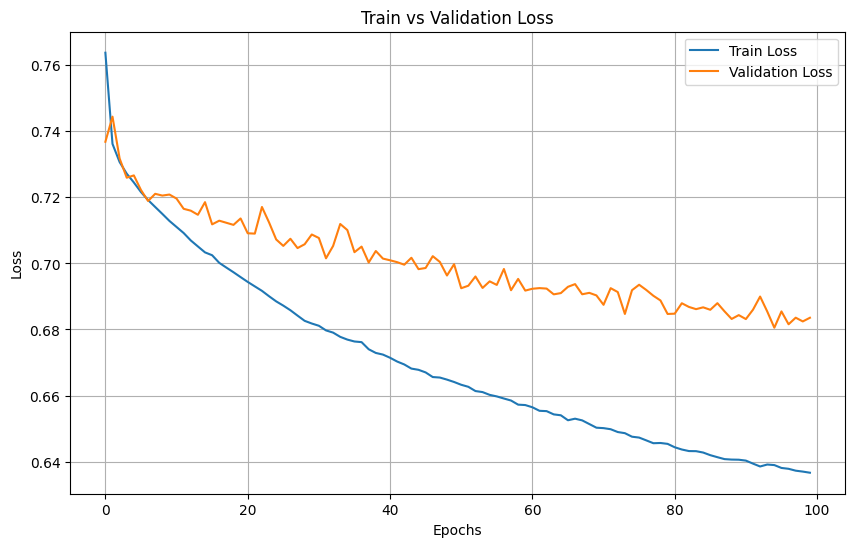

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Evaluamos el modelo

Debes obtener un accuracy mayor o igual a 0.68 y Perdida menor o igual a 0.68

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Red Neuronal – Pérdida: {loss:.3f}, Accuracy: {accuracy:.3f}")


Red Neuronal – Pérdida: 0.684, Accuracy: 0.700


## Parte C: Aplica dos modelos supervisados al mismo dataset (45 puntos)
* Aplica dos modelos a elección.
* Añade el accuracy de cada modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_acc:.3f}")

Random Forest Accuracy: 0.799


In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

Gradient Boosting Accuracy: 0.6835
